# Neural network basics in Numpy

## Regression problem



Here we use a simple problem to demonstrate regression problem. The problem is to use population of the city to predict restaurant profits. We can load the data and visualize the shape.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

data = np.loadtxt("ex1data1.txt", delimiter=',')
x = data[:,0]
y = data[:,1]

print(x.shape, y.shape)
print(x[:100], y[:100])

plt.scatter(x, y, marker='x', c='r')
# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()


FileNotFoundError: ex1data1.txt not found.

###Compute cost

Since it's a regression problem, we use MSE as the loss function.

In [ ]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities)
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]

    # You need to return this variable correctly
    total_cost = 0

    # Here we go through each input in a loop
    for x_, y_ in zip(x, y):
        # Forward pass
        f_wb = w*x_+b
        # Compute cost
        c_ = (f_wb-y_)**2 #
        total_cost+=c_

    total_cost = total_cost/(2*len(y))

    return total_cost

Let's check this implementation. The cost should be 75.203.

In [ ]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x, y, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w (zeros): {cost:.3f}')



<class 'numpy.float64'>
Cost at initial w (zeros): 75.203


###Compute gradient



In [ ]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities)
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """

    # Number of training examples
    m = x.shape[0]

    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0

    # Here we go through all data in a vectorized fashion.
    # In practice, this implementation is faster than loop.
    w_ = np.ones(m,)*w
    b_ = np.ones(m,)*b

    # Forward pass
    f_ = np.multiply(w_,x)+b_

    # Backward pass
    dj_db = np.sum(f_-y)/m
    dj_dw = np.sum(np.multiply(f_-y, x))/m


    return dj_dw, dj_db

Here we can test our implementation. The output should be -65.3 and -5.8.

In [ ]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x, y, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -65.32884974555671 -5.839135051546393


### Gradient descent

In [ ]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    # number of training examples
    m = len(x)

    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

In [ ]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x ,y, initial_w, initial_b,
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.6302914394043597


Now we can computer the predicted output.

In [ ]:
m = x.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

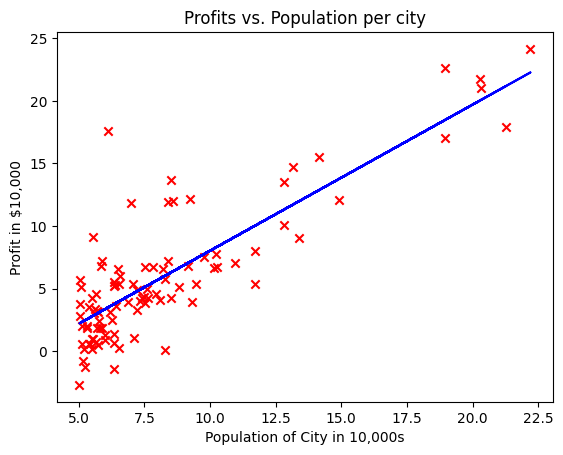

In [ ]:
# Plot the linear fit
plt.plot(x, predicted, c = "b")

# Create a scatter plot of the data.
plt.scatter(x, y, marker='x', c='r')

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

##Classification problem

Here the dataset is to use exam scores of 2 exams of a student to predict if the student will be admitted. We can load and plot the data.

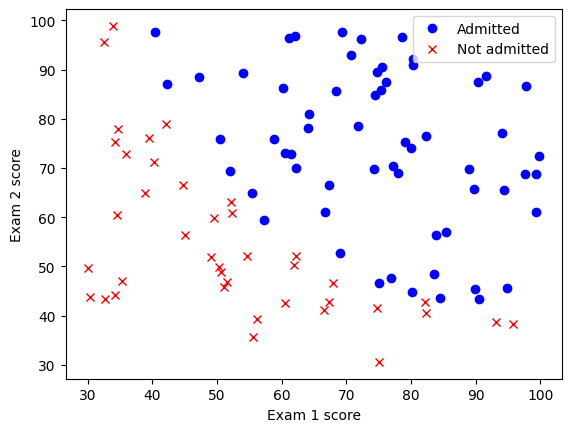

In [ ]:
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:,:2]
y = data[:,2]

# visualize data
plt.plot(X[y==1,0],X[y==1,1],'bo',label = 'Admitted')
plt.plot(X[y==0,0],X[y==0,1],'rx',label = 'Not admitted')
plt.legend(loc="upper right")
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.show()

### Sigmoid function

In binary classification (logistic regression), sigmoid function is used as the activation function. Here let's implement our own sigmoid function.

In [ ]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """

    g = 1/(1+np.exp(-z))

    return g

Let's test the code with input 0. The output should be 0.5.

In [ ]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(0) = " + str(sigmoid(10000)))


sigmoid(0) = 0.5
sigmoid(0) = 1.0


###Compute cost

In [ ]:
def compute_cost_loop(X, y, w, b):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value
      w : (array_like Shape (n,)) Values of parameters of the model
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost
    """

    m, n = X.shape
    total_cost = 0
    # here we go through data via a loop
    for i in range(m):
      x_ = X[i,:]
      y_ = y[i]
      z = np.dot(w, x_)+b
      f_wb = sigmoid(z)
      if y_ == 1:
         total_cost+=np.log(f_wb)/(-m)
      elif y_ == 0:
         total_cost+=np.log(1-f_wb)/(-m)

    return total_cost

We can test the code here. The output should be 0.693.

In [ ]:
m, n = X.shape
# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost_loop(X, y, initial_w, initial_b)
print('Cost at initial w (zeros): {}'.format(cost))

Cost at initial w (zeros): 0.6931471805599461


### Compute gradient


In [ ]:
def compute_gradient_loop(X, y, w, b):
    """
    Computes the gradient for logistic regression

    Args:
      X : (ndarray Shape (m,n)) variable such as house size
      y : (array_like Shape (m,1)) actual value
      w : (array_like Shape (n,1)) values of parameters of the model
      b : (scalar)                 value of parameter of the model
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w.
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b.
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.


    for i in range(m):
        loss = sigmoid(np.dot(X[i,:], w)+b) - y[i]

        dj_db+=loss
        for j in range(n):
            dj_dw[j] += loss*X[i,j]

    dj_db = dj_db/m
    dj_dw = dj_dw/m

    return dj_db, dj_dw

Test the code. The output should be [-0.1], [-12.0, -11.3]

In [ ]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient_loop(X, y, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )



dj_db at initial w (zeros):-0.1
dj_dw at initial w (zeros):[-12.00921658929115, -11.262842205513591]


###Gradient descent

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

In [ ]:
# notice in this updated version, X is a matrix to handle multiple input
def gradient_descent_log(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant

    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    # number of training examples
    m = len(X)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(X, y, w_in, b_in)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, b_in, J_history, w_history #return w and J,w history for graphing


np.random.seed(42)
initial_w = 0.01 * (np.random.rand(X.shape[1]).reshape(-1,1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent_log(X,y, initial_w, initial_b,
                                   compute_cost_loop, compute_gradient_loop, alpha, iterations)

ValueError: shapes (2,) and (230,) not aligned: 2 (dim 0) != 230 (dim 0)

###Predict



In [ ]:
def predict(X, w, b):
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w

    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape
    p = np.zeros(m)

    p = sigmoid(np.matmul(X, w)+b)
    p[p >= 0.5] = 1
    p[p<0.5] = 0

    return p

In [ ]:
pred_y = predict(X, w, b)
print('Accuracy: %d' % float((np.dot(y,pred_y) + np.dot(1-y,1-pred_y))/float(y.size)*100) + '%')

Accuracy: 92%


We can visualize the result.

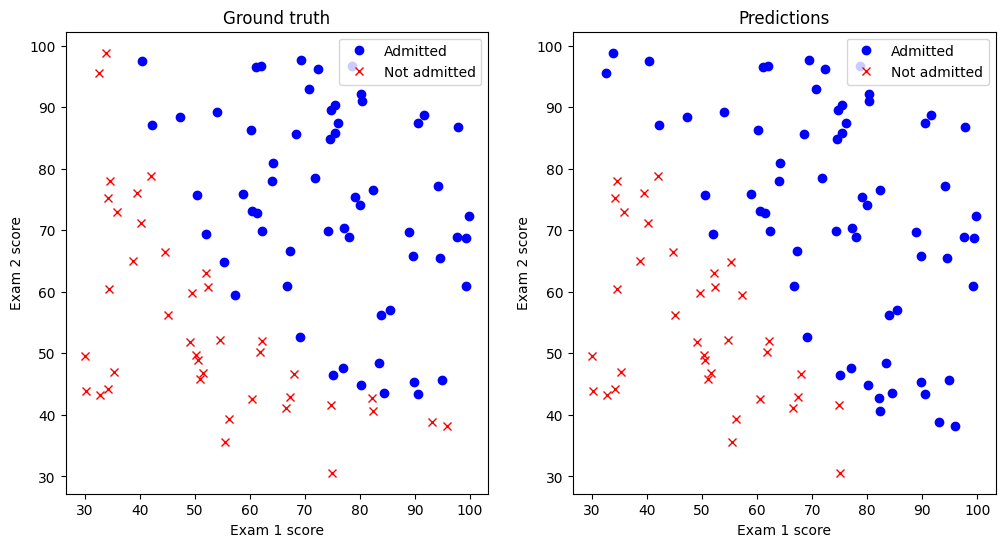

In [ ]:
# compare result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1);
plt.plot(X[y==1,0],X[y==1,1],'bo',label = 'Admitted')
plt.plot(X[y==0,0],X[y==0,1],'rx',label = 'Not admitted')
plt.legend(loc="upper right")
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.title('Ground truth')

plt.subplot(1, 2, 2);
plt.plot(X[pred_y==1,0],X[pred_y==1,1],'bo',label = 'Admitted')
plt.plot(X[pred_y==0,0],X[pred_y==0,1],'rx',label = 'Not admitted')
plt.legend(loc="upper right")
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.title('Predictions')

plt.show()

##Regularization

Let's look at another example where the data is not linearly separable.

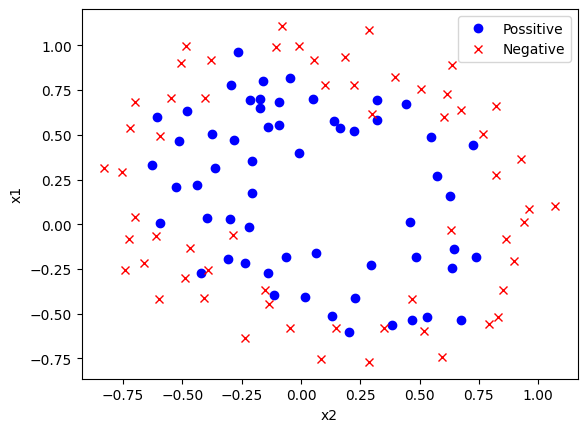

In [ ]:
data = np.loadtxt('ex2data2.txt', delimiter=',')
X = data[:,:2]
y = data[:,2]

# visualize data
plt.plot(X[y==1,0],X[y==1,1],'bo',label = 'Possitive')
plt.plot(X[y==0,0],X[y==0,1],'rx',label = 'Negative')
plt.legend(loc="upper right")
plt.ylabel('x1')
plt.xlabel('x2')
plt.show()

On top of the simple linear regression model, we introduce non-linearity by feature engineering.

In [ ]:
def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features
    """
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 20
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [ ]:
print("Original shape of data:", X.shape)

X_mapped =  map_feature(X[:, 0], X[:, 1])
print("Shape after feature mapping:", X_mapped.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 230)


###Compute cost with regularization

We can add a regularization term in the cost with a parameter lambda to determine the weight.

In [ ]:
# UNQ_C5
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (array_like Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value
      w : (array_like Shape (n,)) Values of parameters of the model
      b : (array_like Shape (n,)) Values of bias parameter of the model
      lambda_ : (scalar, float)    Controls amount of regularization
    Returns:
      total_cost: (scalar)         cost
    """

    m, n = X.shape

    # Calls the compute_cost function that you implemented above
    cost_without_reg = compute_cost_loop(X, y, w, b)

    # You need to calculate this value
    reg_cost = 0.

    reg_cost = np.sum(np.square(w))

    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + (lambda_/(2 * m)) * reg_cost

    return total_cost

We can test this code. The output should be 0.66.

In [ ]:
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

Regularized cost : 0.9063942982519281


###Compute gradient with regularization

Similarly, we can add the regularization part to the gradient function.


In [ ]:
def compute_gradient_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the gradient for linear regression

    Args:
      X : (ndarray Shape (m,n))   variable such as house size
      y : (ndarray Shape (m,))    actual value
      w : (ndarray Shape (n,))    values of parameters of the model
      b : (scalar)                value of parameter of the model
      lambda_ : (scalar,float)    regularization constant
    Returns
      dj_db: (scalar)             The gradient of the cost w.r.t. the parameter b.
      dj_dw: (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w.

    """
    m, n = X.shape

    dj_db, dj_dw = compute_gradient_loop(X, y, w, b)

    dj_dw = dj_dw + w*lambda_/m

    return dj_db, dj_dw

We can test this code. The output should be [0.07] [-0.01, 0.01, 0.05, 0.003]

In [ ]:
np.random.seed(1)
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5

lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

dj_db: 0.09353423811331944
First few elements of regularized dj_dw:
 [-0.021979583894165856, 0.041806317690575315, 0.04863860128958803, 0.0008938378189808182]


### Gradient descent


In [ ]:
def gradient_descent_reg(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant

    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    # number of training examples
    m = len(X)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [ ]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 0.01;
# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent_reg(X_mapped, y, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_)

Iteration    0: Cost     0.93   
Iteration 1000: Cost     0.57   
Iteration 2000: Cost     0.54   
Iteration 3000: Cost     0.52   
Iteration 4000: Cost     0.50   
Iteration 5000: Cost     0.49   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.44   


### Predict

In [ ]:
pred_y = predict(X_mapped, w, b)
print('Accuracy: %d' % float((np.dot(y,pred_y) + np.dot(1-y,1-pred_y))/float(y.size)*100) + '%')

Accuracy: 82%


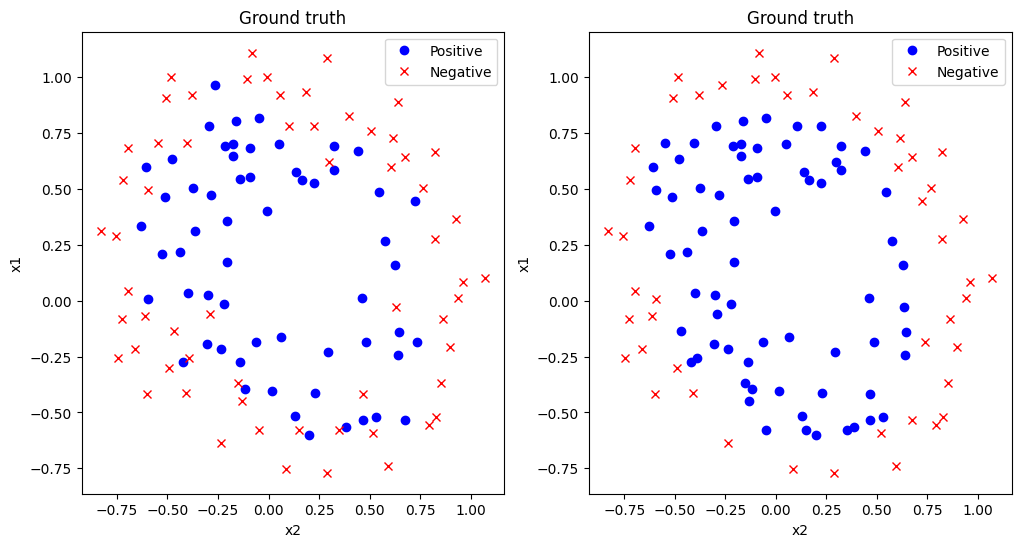

In [ ]:
# compare result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1);
plt.plot(X[y==1,0],X[y==1,1],'bo',label = 'Positive')
plt.plot(X[y==0,0],X[y==0,1],'rx',label = 'Negative')
plt.legend(loc="upper right")
plt.ylabel('x1')
plt.xlabel('x2')
plt.title('Ground truth')

plt.subplot(1, 2, 2);
plt.plot(X[pred_y==1,0],X[pred_y==1,1],'bo',label = 'Positive')
plt.plot(X[pred_y==0,0],X[pred_y==0,1],'rx',label = 'Negative')
plt.legend(loc="upper right")
plt.ylabel('x1')
plt.xlabel('x2')
plt.title('Ground truth')

plt.show()

# Pytorch implementation of a basic multi-layer NN

## Check your environment

Check GPU and torch in your environment. If you are using colab, change runtime type on top right corner to select GPU runtime.

In [ ]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In pytorch, torch.tensor[(documentation)](https://pytorch.org/docs/stable/tensors.html) is used in storing parameters and data, moving data between CPU and GPU memory, and carry out computation. torch.tensor has very similar functionalities and syntex with numpy array.

In [ ]:
print(X.dtype, y.dtype)

# Turn data into tensors
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

print(X.dtype, y.dtype)

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1)

len(X_train), len(X_test), len(y_train), len(y_test)

float64 float64
torch.float32 torch.float32


(94, 24, 94, 24)

## Build a simple NN model.

Here we build a simple NN model with 3 fully-connected layers (torch.nn.linear). You can find most useful layers in torch.nn module. [Documentation](https://pytorch.org/docs/stable/nn.html)

In [ ]:
import torch
from torch import nn

# Here we create a new class for our model, whose parent class is torch.nn.Module. https://pytorch.org/docs/stable/generated/torch.nn.Module.html
class MoonModelV0(nn.Module):
    def __init__(self, in_features, out_features, hidden_units):
        super().__init__()
        # Create 3 linear layers
        self.layer1 = nn.Linear(in_features=in_features,
                                 out_features=hidden_units)
        self.layer2 = nn.Linear(in_features=hidden_units,
                                 out_features=hidden_units)
        self.layer3 = nn.Linear(in_features=hidden_units,
                                out_features=out_features)
        # Create a ReLU activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Pass the data through the 3 layers with ReLU as activation function of
        # each layer
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

# Create an instance of the MoonModelV0 class
model_0 = MoonModelV0(in_features=2,
                      out_features=1,
                      hidden_units=100).to(device)
print(model_0)

NameError: name 'device' is not defined

We can access all the trainable parameters of the model by using state_dict(). [Documentation](https://pytorch.org/tutorials/recipes/recipes/what_is_state_dict.html)

In [ ]:
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.3998, -0.6815],
                      [ 0.6343, -0.0420],
                      [ 0.4860,  0.2127],
                      [ 0.6555,  0.2752],
                      [ 0.0721, -0.6551],
                      [ 0.0497, -0.4003],
                      [ 0.2006,  0.0502],
                      [ 0.1975,  0.6157],
                      [-0.0839,  0.5611],
                      [-0.6503, -0.3570]])),
             ('layer1.bias',
              tensor([ 0.0639,  0.2464, -0.4941, -0.3404,  0.6975, -0.4343, -0.5224,  0.4830,
                      -0.5750, -0.3825])),
             ('layer2.weight',
              tensor([[-0.0445,  0.0819, -0.2389, -0.0803, -0.0494,  0.0083,  0.1049, -0.0817,
                       -0.2123, -0.0798],
                      [-0.1233, -0.2821,  0.3123,  0.3049,  0.2509,  0.0937,  0.0125, -0.2017,
                       -0.2539,  0.0563],
                      [ 0.1896,  0.2450,  0.0978, -0.0620,  0.0213,  0.2075

## Setup loss function and optimizer of the model.

Since we are dealing with a binary classification problem, we use BCEWithLogitsLoss().

We use the basic SGD function as the optimizer.

In [ ]:
loss_fn = nn.BCEWithLogitsLoss() # sigmoid layer built-in

# loss_fn = nn.BCELoss() # requires sigmoid layer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of model to optimize
                            lr=0.1, # learning rate
                            weight_decay=1e-5) # regularization lambda

## Create training and testing loop to fit the model to dataset.

In [ ]:
# What's coming out of our model?

# logits (raw outputs of model)
print("Logits:")
print(model_0(X_train.to(device)[:10]).squeeze())

# Prediction probabilities
print("Pred probs:")
print(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze()))

# Prediction probabilities
print("Pred labels:")
print(torch.round(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze())))

Logits:
tensor([0.0736, 0.0644, 0.0993, 0.0636, 0.1057, 0.1253, 0.0877, 0.0782, 0.0569,
        0.0590], grad_fn=<SqueezeBackward0>)
Pred probs:
tensor([0.5184, 0.5161, 0.5248, 0.5159, 0.5264, 0.5313, 0.5219, 0.5195, 0.5142,
        0.5147], grad_fn=<SigmoidBackward0>)
Pred labels:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<RoundBackward0>)


In [ ]:
# Let's calculate the accuracy
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 43.8 MB/s eta 0:00:00


In [ ]:
torch.manual_seed(1)

epochs=4000

# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  # print(y_logits[:5]) # model raw outputs are "logits"
  y_pred_probs = torch.sigmoid(y_logits)
  y_pred = torch.round(y_pred_probs)

  # 2. Calculaute the loss
  loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs
  acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()

  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Caculate the loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test.int())

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.70 Acc: 0.46 | Test loss: 0.68 Test acc: 0.71
Epoch: 100 | Loss: 0.69 Acc: 0.54 | Test loss: 0.73 Test acc: 0.29
Epoch: 200 | Loss: 0.69 Acc: 0.54 | Test loss: 0.73 Test acc: 0.29
Epoch: 300 | Loss: 0.69 Acc: 0.54 | Test loss: 0.73 Test acc: 0.29
Epoch: 400 | Loss: 0.68 Acc: 0.56 | Test loss: 0.72 Test acc: 0.33
Epoch: 500 | Loss: 0.68 Acc: 0.64 | Test loss: 0.72 Test acc: 0.46
Epoch: 600 | Loss: 0.67 Acc: 0.64 | Test loss: 0.71 Test acc: 0.46
Epoch: 700 | Loss: 0.65 Acc: 0.63 | Test loss: 0.70 Test acc: 0.50
Epoch: 800 | Loss: 0.64 Acc: 0.66 | Test loss: 0.69 Test acc: 0.50
Epoch: 900 | Loss: 0.61 Acc: 0.68 | Test loss: 0.68 Test acc: 0.54
Epoch: 1000 | Loss: 0.59 Acc: 0.70 | Test loss: 0.68 Test acc: 0.54
Epoch: 1100 | Loss: 0.56 Acc: 0.70 | Test loss: 0.68 Test acc: 0.58
Epoch: 1200 | Loss: 0.54 Acc: 0.72 | Test loss: 0.67 Test acc: 0.58
Epoch: 1300 | Loss: 0.50 Acc: 0.78 | Test loss: 0.63 Test acc: 0.62
Epoch: 1400 | Loss: 0.47 Acc: 0.74 | Test loss: 0.56 Test ac

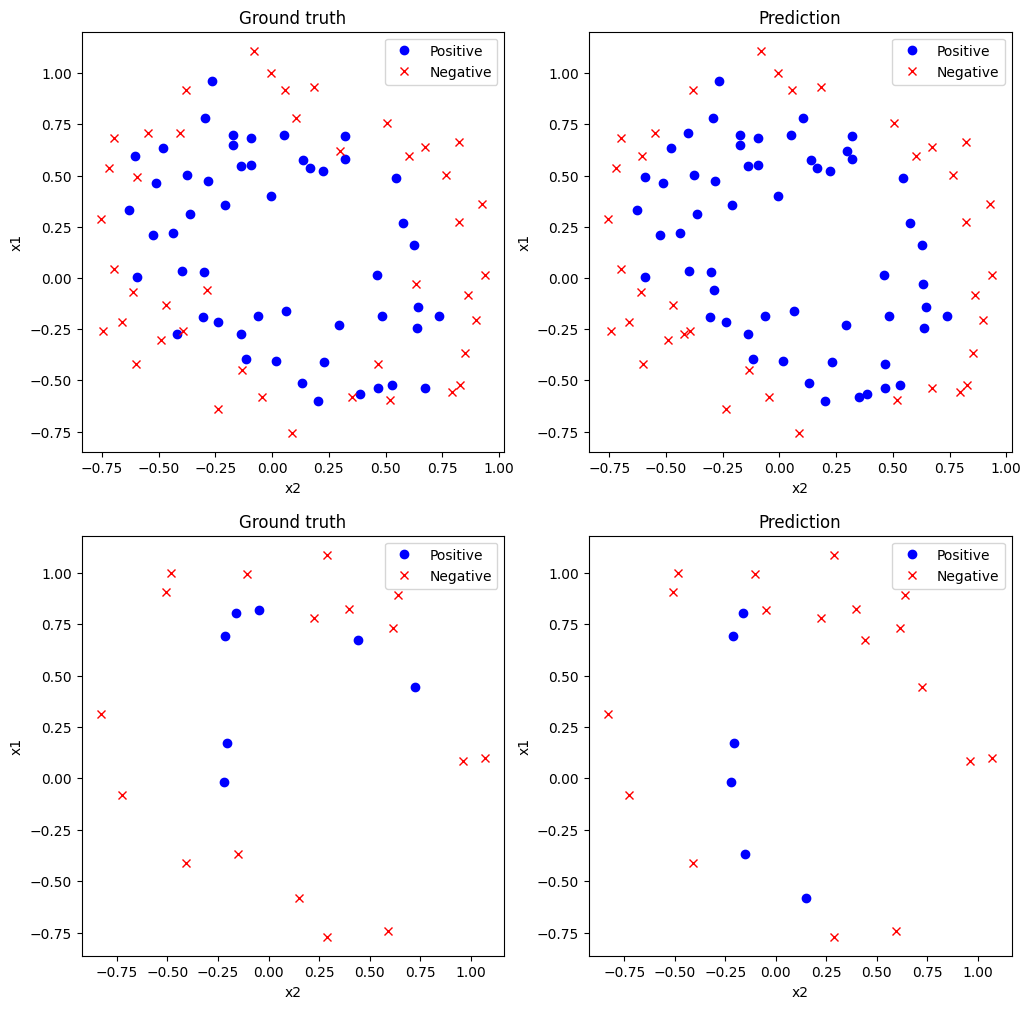

In [ ]:
# convert tensor to numpy
X_train = X_train.cpu().numpy()
X_test = X_test.cpu().numpy()
y_train = y_train.cpu().numpy()
y_test = y_test.cpu().numpy()

y_pred = y_pred.squeeze().detach().cpu().numpy()
test_pred = test_pred.squeeze().detach().cpu().numpy()

# Visualize the ground truth on a plot
plt.figure(figsize=(12, 12))
# compare result
plt.subplot(2, 2, 1);
plt.plot(X_train[y_train==1,0],X_train[y_train==1,1],'bo',label = 'Positive')
plt.plot(X_train[y_train==0,0],X_train[y_train==0,1],'rx',label = 'Negative')
plt.legend(loc="upper right")
plt.ylabel('x1')
plt.xlabel('x2')
plt.title('Ground truth')

plt.subplot(2, 2, 2);
plt.plot(X_train[y_pred==1,0],X_train[y_pred==1,1],'bo',label = 'Positive')
plt.plot(X_train[y_pred==0,0],X_train[y_pred==0,1],'rx',label = 'Negative')
plt.legend(loc="upper right")
plt.ylabel('x1')
plt.xlabel('x2')
plt.title('Prediction')

plt.subplot(2, 2, 3);
plt.plot(X_test[y_test==1,0],X_test[y_test==1,1],'bo',label = 'Positive')
plt.plot(X_test[y_test==0,0],X_test[y_test==0,1],'rx',label = 'Negative')
plt.legend(loc="upper right")
plt.ylabel('x1')
plt.xlabel('x2')
plt.title('Ground truth')

plt.subplot(2, 2, 4);
plt.plot(X_test[test_pred==1,0],X_test[test_pred==1,1],'bo',label = 'Positive')
plt.plot(X_test[test_pred==0,0],X_test[test_pred==0,1],'rx',label = 'Negative')
plt.legend(loc="upper right")
plt.ylabel('x1')
plt.xlabel('x2')
plt.title('Prediction')

plt.show()

# Compare with predicted result